In [42]:
#import tools
import pandas as pd
import seaborn as sns
import json
from urllib import request
import matplotlib.pyplot as plt

In [2]:
#downloading Steph Curry data from murach.com walkthrough
shots_url = 'https://www.murach.com/python_analysis/shots.json'
shots = request.urlretrieve(shots_url, filename='shots.json')
#loading shots into a dictionary
with open('shots.json') as jsonData:
    shots = json.load(jsonData)
shots.keys()

dict_keys(['resource', 'parameters', 'resultSets'])

In [3]:
#building the dataframe:
#1-get column headers-
columnHeaders = shots['resultSets'][0]['headers']
#lowercasing any caps:
columnHeaders = [x.lower() for x in columnHeaders]
columnHeaders

['grid_type',
 'game_id',
 'game_event_id',
 'player_id',
 'player_name',
 'team_id',
 'team_name',
 'period',
 'minutes_remaining',
 'seconds_remaining',
 'event_type',
 'action_type',
 'shot_type',
 'shot_zone_basic',
 'shot_zone_area',
 'shot_zone_range',
 'shot_distance',
 'loc_x',
 'loc_y',
 'shot_attempted_flag',
 'shot_made_flag',
 'game_date',
 'htm',
 'vtm']

In [4]:
#getting rows data:
rows = shots['resultSets'][0]['rowSet']

In [5]:
#building the dataframe
shots = pd.DataFrame(data = rows, columns=columnHeaders)
shots

,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,seconds_remaining,...,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm
0,Shot Chart Detail,0020900015,4,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,25,...,Right Side Center(RC),24+ ft.,26,99,249,1,0,20091028,GSW,HOU
1,Shot Chart Detail,0020900015,17,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,31,...,Left Side Center(LC),16-24 ft.,18,-122,145,1,1,20091028,GSW,HOU
2,Shot Chart Detail,0020900015,53,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,2,...,Center(C),8-16 ft.,14,-60,129,1,0,20091028,GSW,HOU
3,Shot Chart Detail,0020900015,141,201939,Stephen Curry,1610612744,Golden State Warriors,2,9,49,...,Left Side(L),16-24 ft.,19,-172,82,1,0,20091028,GSW,HOU
4,Shot Chart Detail,0020900015,249,201939,Stephen Curry,1610612744,Golden State Warriors,2,2,19,...,Left Side Center(LC),16-24 ft.,16,-68,148,1,0,20091028,GSW,HOU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11841,Shot Chart Detail,0021801205,533,201939,Stephen Curry,1610612744,Golden State Warriors,3,0,3,...,Left Side Center(LC),24+ ft.,30,-201,224,1,1,20190407,GSW,LAC
11842,Shot Chart Detail,0021801215,25,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,49,...,Left Side(L),16-24 ft.,18,-180,-15,1,0,20190409,NOP,GSW
11843,Shot Chart Detail,0021801215,48,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,1,...,Center(C),24+ ft.,26,73,255,1,1,20190409,NOP,GSW
11844,Shot Chart Detail,0021801215,61,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,36,...,Right Side Center(RC),24+ ft.,23,132,199,1,0,20190409,NOP,GSW


In [6]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11846 entries, 0 to 11845
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   grid_type            11846 non-null  object
 1   game_id              11846 non-null  object
 2   game_event_id        11846 non-null  int64 
 3   player_id            11846 non-null  int64 
 4   player_name          11846 non-null  object
 5   team_id              11846 non-null  int64 
 6   team_name            11846 non-null  object
 7   period               11846 non-null  int64 
 8   minutes_remaining    11846 non-null  int64 
 9   seconds_remaining    11846 non-null  int64 
 10  event_type           11846 non-null  object
 11  action_type          11846 non-null  object
 12  shot_type            11846 non-null  object
 13  shot_zone_basic      11846 non-null  object
 14  shot_zone_area       11846 non-null  object
 15  shot_zone_range      11846 non-null  object
 16  shot

In [7]:
shots.event_type

0        Missed Shot
1          Made Shot
2        Missed Shot
3        Missed Shot
4        Missed Shot
            ...     
11841      Made Shot
11842    Missed Shot
11843      Made Shot
11844    Missed Shot
11845      Made Shot
Name: event_type, Length: 11846, dtype: object

In [8]:
shots.action_type

0                  Jump Shot
1        Step Back Jump shot
2                  Jump Shot
3                  Jump Shot
4                  Jump Shot
                ...         
11841    Step Back Jump shot
11842    Step Back Jump shot
11843              Jump Shot
11844              Jump Shot
11845              Jump Shot
Name: action_type, Length: 11846, dtype: object

In [9]:
shots.shot_type

0        3PT Field Goal
1        2PT Field Goal
2        2PT Field Goal
3        2PT Field Goal
4        2PT Field Goal
              ...      
11841    3PT Field Goal
11842    2PT Field Goal
11843    3PT Field Goal
11844    3PT Field Goal
11845    2PT Field Goal
Name: shot_type, Length: 11846, dtype: object

### Cleaning the Data:

These are some suggestions in the book:<br>
- `period` column holds even the overtime periods in a game. We can set these from 1-4 to stay in regular gameplay.
- dropping unneeded columns (ie for this example is `game_event_id`)
- can drop redundant columns (ie `shot_attempted` as we have shot made or not)

In [10]:
#cleaning the data: looking at periods column
shots.period.unique()


array([1, 2, 4, 3, 5, 6])

In [11]:
#dropping rows with periods 5 & 6
shots = shots.query('period < 5.0')

In [12]:
#now looking at periods:
shots.period.unique()

array([1, 2, 4, 3])

In [13]:
#locate unneeded columns:
shots.nunique(dropna=False)

grid_type                1
game_id                692
game_event_id          692
player_id                1
player_name              1
team_id                  1
team_name                1
period                   4
minutes_remaining       12
seconds_remaining       60
event_type               2
action_type             51
shot_type                2
shot_zone_basic          7
shot_zone_area           6
shot_zone_range          5
shot_distance           71
loc_x                  489
loc_y                  437
shot_attempted_flag      1
shot_made_flag           2
game_date              692
htm                     32
vtm                     32
dtype: int64

### for this breakdown, I won't need many of the columns listed. I'll drop these so I have a better time viewing my df.

In [14]:
shots = shots.drop(columns=['grid_type','game_event_id','team_id','team_name','player_id','shot_zone_basic','player_name','shot_attempted_flag'])

In [15]:
shots

,game_id,period,minutes_remaining,seconds_remaining,event_type,action_type,shot_type,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm
0,0020900015,1,11,25,Missed Shot,Jump Shot,3PT Field Goal,Right Side Center(RC),24+ ft.,26,99,249,0,20091028,GSW,HOU
1,0020900015,1,9,31,Made Shot,Step Back Jump shot,2PT Field Goal,Left Side Center(LC),16-24 ft.,18,-122,145,1,20091028,GSW,HOU
2,0020900015,1,6,2,Missed Shot,Jump Shot,2PT Field Goal,Center(C),8-16 ft.,14,-60,129,0,20091028,GSW,HOU
3,0020900015,2,9,49,Missed Shot,Jump Shot,2PT Field Goal,Left Side(L),16-24 ft.,19,-172,82,0,20091028,GSW,HOU
4,0020900015,2,2,19,Missed Shot,Jump Shot,2PT Field Goal,Left Side Center(LC),16-24 ft.,16,-68,148,0,20091028,GSW,HOU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11841,0021801205,3,0,3,Made Shot,Step Back Jump shot,3PT Field Goal,Left Side Center(LC),24+ ft.,30,-201,224,1,20190407,GSW,LAC
11842,0021801215,1,9,49,Missed Shot,Step Back Jump shot,2PT Field Goal,Left Side(L),16-24 ft.,18,-180,-15,0,20190409,NOP,GSW
11843,0021801215,1,8,1,Made Shot,Jump Shot,3PT Field Goal,Center(C),24+ ft.,26,73,255,1,20190409,NOP,GSW
11844,0021801215,1,6,36,Missed Shot,Jump Shot,3PT Field Goal,Right Side Center(RC),24+ ft.,23,132,199,0,20190409,NOP,GSW


In [16]:
#coverting game_date into datetime data:
shots.game_date = pd.to_datetime(shots.game_date)

In [17]:
shots.dtypes

game_id                      object
period                        int64
minutes_remaining             int64
seconds_remaining             int64
event_type                   object
action_type                  object
shot_type                    object
shot_zone_area               object
shot_zone_range              object
shot_distance                 int64
loc_x                         int64
loc_y                         int64
shot_made_flag                int64
game_date            datetime64[ns]
htm                          object
vtm                          object
dtype: object

### I'm going to look at columns that are needed/wanted. 
Such as, adding in a column that tells what season a game is in. <br>
I also will play around with the shot_made_flag column to just make a column called `shot results`

In [18]:
#first, setting index:
shots.set_index('game_id', inplace=True)

In [19]:
#creating a function that can look at the date of each row and determine the season
def get_season(row):
    if row.game_date.month > 6:
        season = f'{row.game_date.year}-{row.game_date.year + 1}'
    else:
        season = f'{row.game_date.year - 1}-{row.game_date.year}'
    return season

In [20]:
shots['season']= shots.apply(get_season, axis=1)

In [21]:
shots.head()

,period,minutes_remaining,seconds_remaining,event_type,action_type,shot_type,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season
game_id,,,,,,,,,,,,,,,,
0020900015,1,11,25,Missed Shot,Jump Shot,3PT Field Goal,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,2009-2010
0020900015,1,9,31,Made Shot,Step Back Jump shot,2PT Field Goal,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,2009-2010
0020900015,1,6,2,Missed Shot,Jump Shot,2PT Field Goal,Center(C),8-16 ft.,14,-60,129,0,2009-10-28,GSW,HOU,2009-2010
0020900015,2,9,49,Missed Shot,Jump Shot,2PT Field Goal,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,GSW,HOU,2009-2010
0020900015,2,2,19,Missed Shot,Jump Shot,2PT Field Goal,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,GSW,HOU,2009-2010


In [22]:
#changing event_type to shot result:
shots.rename(columns = {'event_type': 'shot_result'}, inplace = True)
#then replacing string to only say 'missed' and 'made'
shots.shot_result = shots.shot_result.replace({'Missed Shot':'Missed', 'Made Shot':'Made'})

In [23]:
shots

,period,minutes_remaining,seconds_remaining,shot_result,action_type,shot_type,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season
game_id,,,,,,,,,,,,,,,,
0020900015,1,11,25,Missed,Jump Shot,3PT Field Goal,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,2009-2010
0020900015,1,9,31,Made,Step Back Jump shot,2PT Field Goal,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,2009-2010
0020900015,1,6,2,Missed,Jump Shot,2PT Field Goal,Center(C),8-16 ft.,14,-60,129,0,2009-10-28,GSW,HOU,2009-2010
0020900015,2,9,49,Missed,Jump Shot,2PT Field Goal,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,GSW,HOU,2009-2010
0020900015,2,2,19,Missed,Jump Shot,2PT Field Goal,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,GSW,HOU,2009-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0021801205,3,0,3,Made,Step Back Jump shot,3PT Field Goal,Left Side Center(LC),24+ ft.,30,-201,224,1,2019-04-07,GSW,LAC,2018-2019
0021801215,1,9,49,Missed,Step Back Jump shot,2PT Field Goal,Left Side(L),16-24 ft.,18,-180,-15,0,2019-04-09,NOP,GSW,2018-2019
0021801215,1,8,1,Made,Jump Shot,3PT Field Goal,Center(C),24+ ft.,26,73,255,1,2019-04-09,NOP,GSW,2018-2019


### Adding a column for the points made for each shot, by looking at if the shot was made or not:

In [24]:
#looking at string text for values:
shots['shot_type'].unique()

array(['3PT Field Goal', '2PT Field Goal'], dtype=object)

In [26]:
#adding the points made column:
shots['points_made'] = shots.apply(lambda x: 0 if x.shot_result == 'Missed' else(3 if x.shot_type == '3PT Field Goal' else 2), axis =1)

In [27]:
shots.head()

,period,minutes_remaining,seconds_remaining,shot_result,action_type,shot_type,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season,points_made
game_id,,,,,,,,,,,,,,,,,
0020900015,1,11,25,Missed,Jump Shot,3PT Field Goal,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,2009-2010,0
0020900015,1,9,31,Made,Step Back Jump shot,2PT Field Goal,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,2009-2010,2
0020900015,1,6,2,Missed,Jump Shot,2PT Field Goal,Center(C),8-16 ft.,14,-60,129,0,2009-10-28,GSW,HOU,2009-2010,0
0020900015,2,9,49,Missed,Jump Shot,2PT Field Goal,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,GSW,HOU,2009-2010,0
0020900015,2,2,19,Missed,Jump Shot,2PT Field Goal,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,GSW,HOU,2009-2010,0


### Adding summary columns for points, shots attempted, and shots made:

In [28]:
shots['points_made_per_game'] = shots.groupby('game_id').points_made.transform('sum')
shots['shots_attempted'] = shots.groupby('game_id').shot_made_flag.transform('count')
shots['shots_made'] = shots.groupby('game_id').shot_made_flag.transform('sum')

In [29]:
shots.head()

,period,minutes_remaining,seconds_remaining,shot_result,action_type,shot_type,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season,points_made,points_made_per_game,shots_attempted,shots_made
game_id,,,,,,,,,,,,,,,,,,,,
0020900015,1,11,25,Missed,Jump Shot,3PT Field Goal,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,2009-2010,0,14,12,7
0020900015,1,9,31,Made,Step Back Jump shot,2PT Field Goal,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,2009-2010,2,14,12,7
0020900015,1,6,2,Missed,Jump Shot,2PT Field Goal,Center(C),8-16 ft.,14,-60,129,0,2009-10-28,GSW,HOU,2009-2010,0,14,12,7
0020900015,2,9,49,Missed,Jump Shot,2PT Field Goal,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,GSW,HOU,2009-2010,0,14,12,7
0020900015,2,2,19,Missed,Jump Shot,2PT Field Goal,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,GSW,HOU,2009-2010,0,14,12,7


## Is Steph Curry improving his performance each year?
The walkthrough shows how to plot out a player's performance using catplots and line plot

In [30]:
#plotting points player made per season:

#getting data for season-
shotsSeason = shots[['season','game_date','points_made_per_game','shots_made','shots_attempted']].drop_duplicates()

In [31]:
#now I have a df of only the data I want for this plot:
shotsSeason.head()

,season,game_date,points_made_per_game,shots_made,shots_attempted
game_id,,,,,
0020900015,2009-2010,2009-10-28,14,7,12
0020900030,2009-2010,2009-10-30,12,5,9
0020900069,2009-2010,2009-11-04,7,3,6
0020900082,2009-2010,2009-11-06,2,1,5
0020900096,2009-2010,2009-11-08,9,4,8


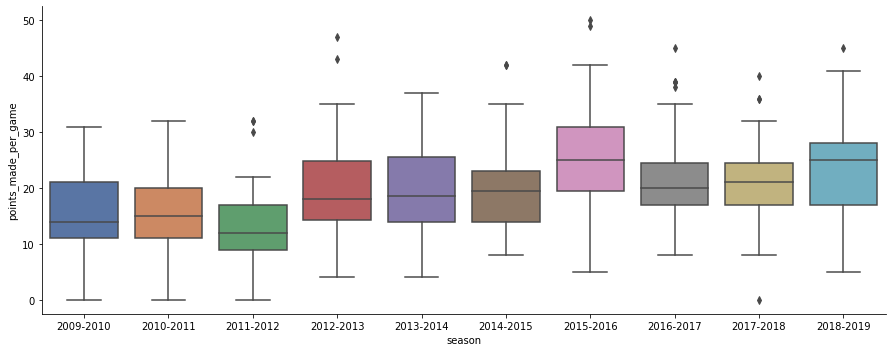

In [32]:
#plotting point per game by season:
sns.catplot(data=shotsSeason, kind='box', x='season', y='points_made_per_game', aspect=2.5, palette ='deep')

### What are Steph Curry's averages of shots, shots made and points per game by season?

In [33]:
#plotting avgs by first grouping the data and renaming it:
shotsSeasonAvg= shotsSeason.groupby('season').mean().reset_index()

<AxesSubplot:xlabel='season'>

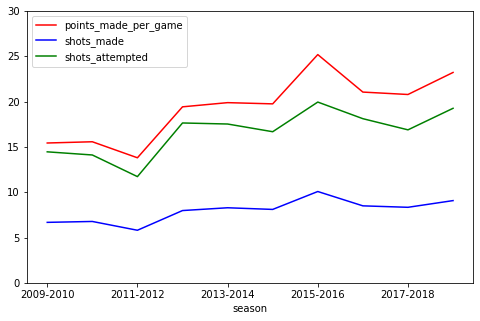

In [36]:
#plotting data with pandas plot:
shotsSeasonAvg.plot(
    x='season', y=['points_made_per_game', 'shots_made','shots_attempted'],
    color={'points_made_per_game':'red', 'shots_made':'blue', 'shots_attempted':'green'},
    figsize=(8,5), ylim=(0,30))

## Plotting the 3pt shots:
Following the books walkthrough, I want to be able to plot Steph Curry's 3pt shots per game:

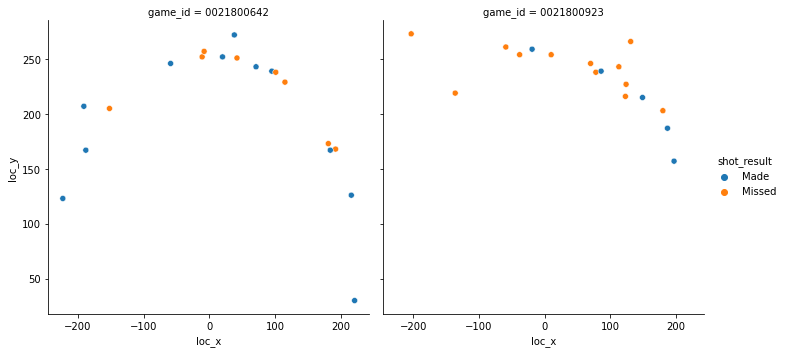

In [40]:
#this shows the plots of two games side-by-side:
gameIDs = ['0021800923', '0021800642']

g = sns.relplot(data=shots.query('game_id in @gameIDs & shot_type == "3PT Field Goal"'), kind = 'scatter',
               x = 'loc_x', y='loc_y', hue='shot_result', col='game_id')

In [45]:
#function from  Savvas Tjortjoglou of how to create an NBA sized court:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

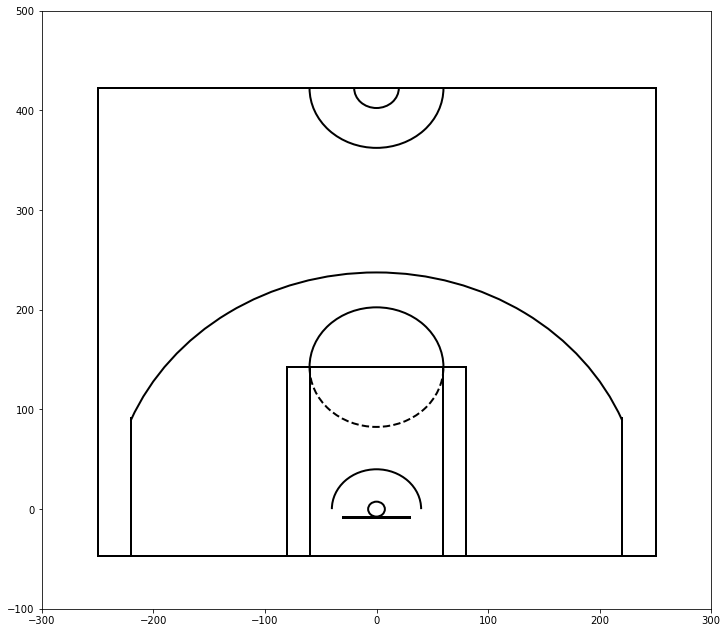

In [46]:
#drawing the court:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

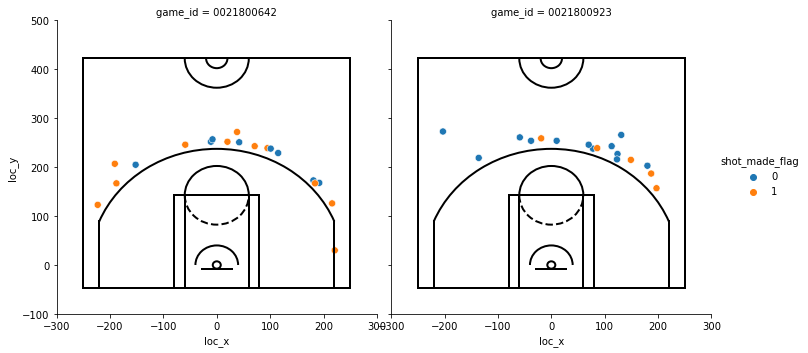

In [47]:
#how to plot the shots and draw the court:

g = sns.relplot(data=shots.query('game_id in @gameIDs & shot_type == "3PT Field Goal"'), kind = 'scatter',
               x = 'loc_x', y='loc_y', hue='shot_made_flag', col='game_id', s=50)

for i, ax in enumerate(g.axes.flat):
    ax = draw_court(ax, outer_lines=True)
    ax.set_xlim(-300, 300)
    ax.set_ylim(-100, 500)

### Now plotting the shots by seasons

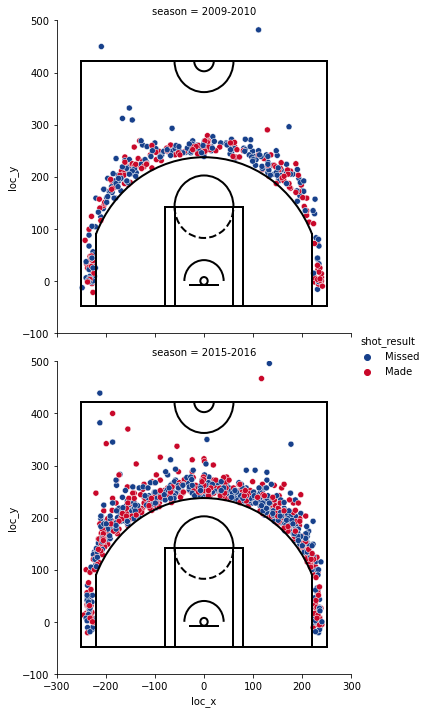

In [52]:
colors = ['#17408B', '#C9082A'] #NBA blue and red
sns.set_palette(sns.color_palette(colors))

seasons = ['2009-2010','2015-2016'] #grabbing two seasons to chart
g = sns.relplot(data=shots.query('season in @seasons & shot_type == "3PT Field Goal"'), kind = 'scatter',
               x = 'loc_x', y='loc_y', hue='shot_result', col='season', col_wrap=1)

for ax in g.axes.flat:
    ax = draw_court(ax, outer_lines=True)
    ax.set_xlim(-300, 300)
    ax.set_ylim(-100, 500)